In [4]:
import pandas as pd

# Load the dataset
file_path = '/content/rainfall.csv'
rainfall_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(rainfall_data.head())


       date  rainfall  temperature  humidity  wind_speed weather_condition
0  1/1/2022      12.5         15.2        78         8.5             Rainy
1  1/2/2022       8.2         17.8        65         5.2             Rainy
2  1/3/2022       0.0         20.1        52         3.1             Sunny
3  1/4/2022       3.7         18.6        71         6.7             Rainy
4  1/5/2022      21.1         14.8        82         9.3             Rainy


In [5]:
#Summary satistics


# Load the dataset
file_path = '/content/rainfall.csv'
rainfall_data = pd.read_csv(file_path)

# Perform summary statistics for numerical columns
summary_statistics = rainfall_data.describe()

# Display the summary statistics
print(summary_statistics)


        rainfall  temperature   humidity  wind_speed
count  53.000000    53.000000  53.000000   53.000000
mean    9.049057    17.950943  69.245283    6.403774
std     6.712521     2.500663  11.969361    2.209069
min     0.000000    13.900000  44.000000    2.100000
25%     3.900000    16.100000  62.000000    4.700000
50%     8.300000    17.800000  72.000000    6.700000
75%    14.800000    19.400000  78.000000    8.300000
max    21.800000    23.400000  89.000000   10.500000


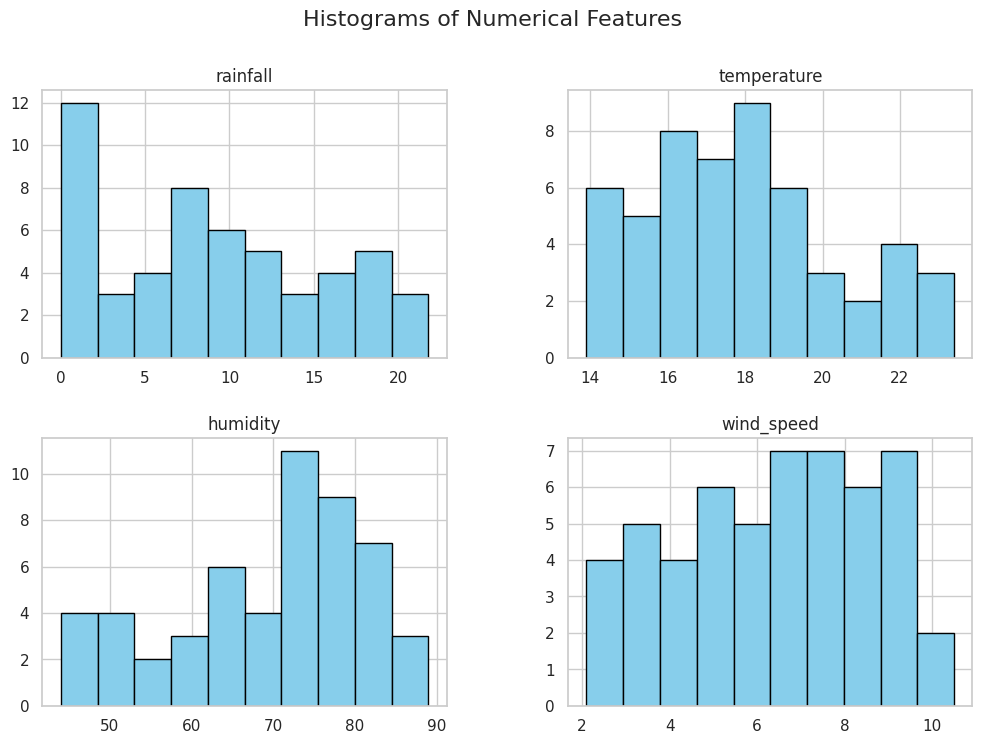

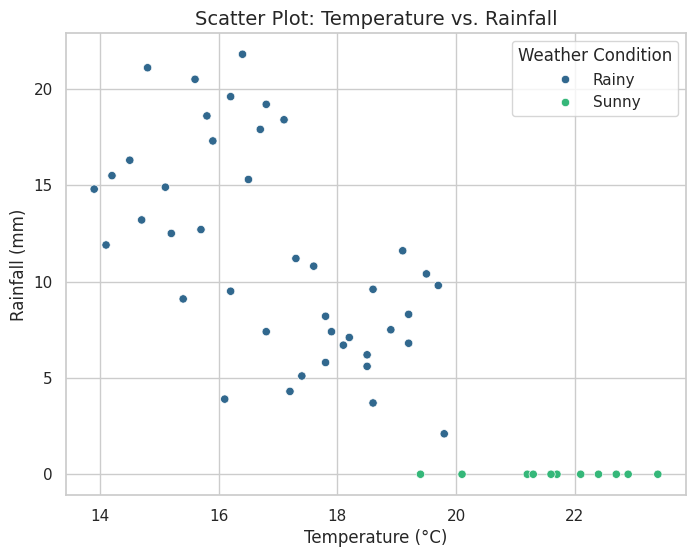

<ipython-input-6-db86b43cb326>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rainfall_data, x='weather_condition', y='rainfall', palette='Set2')


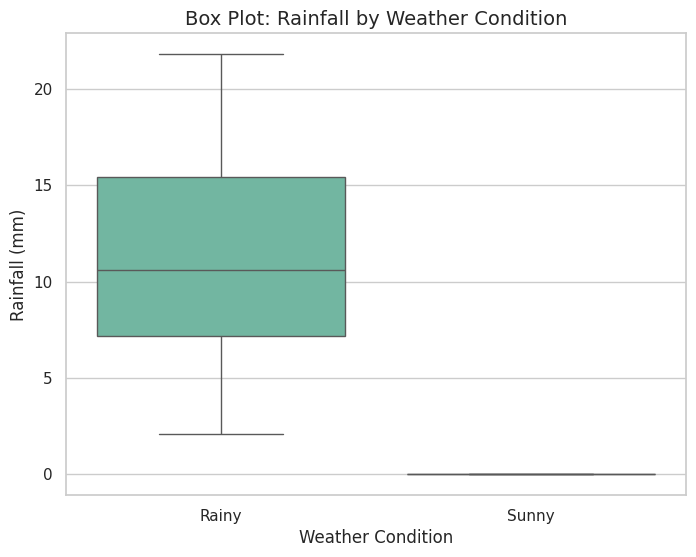

In [6]:
#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/rainfall.csv'
rainfall_data = pd.read_csv(file_path)

# Set the style for the plots
sns.set(style="whitegrid")

# 1. Histograms for numerical columns
rainfall_data.hist(figsize=(12, 8), bins=10, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

# 2. Scatter Plot: Temperature vs. Rainfall
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rainfall_data, x='temperature', y='rainfall', hue='weather_condition', palette='viridis')
plt.title("Scatter Plot: Temperature vs. Rainfall", fontsize=14)
plt.xlabel("Temperature (°C)")
plt.ylabel("Rainfall (mm)")
plt.legend(title="Weather Condition")
plt.show()

# 3. Box Plot: Rainfall by Weather Condition
plt.figure(figsize=(8, 6))
sns.boxplot(data=rainfall_data, x='weather_condition', y='rainfall', palette='Set2')
plt.title("Box Plot: Rainfall by Weather Condition", fontsize=14)
plt.xlabel("Weather Condition")
plt.ylabel("Rainfall (mm)")
plt.show()


In [7]:
# Handle missing values

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
file_path = '/content/rainfall.csv'
rainfall_data = pd.read_csv(file_path)

# 1. Handle missing values
# Check for missing values
print("Missing Values Before Handling:\n", rainfall_data.isnull().sum())

# Fill missing numerical values with the mean
numerical_columns = ['rainfall', 'temperature', 'humidity', 'wind_speed']
for col in numerical_columns:
    rainfall_data[col].fillna(rainfall_data[col].mean(), inplace=True)

# Fill missing categorical values with the mode
categorical_columns = ['weather_condition']
for col in categorical_columns:
    rainfall_data[col].fillna(rainfall_data[col].mode()[0], inplace=True)

print("\nMissing Values After Handling:\n", rainfall_data.isnull().sum())

# 2. Encode categorical variables
label_encoder = LabelEncoder()
rainfall_data['weather_condition'] = label_encoder.fit_transform(rainfall_data['weather_condition'])

# 3. Normalize / Standardize numerical features
scaler = StandardScaler()
rainfall_data[numerical_columns] = scaler.fit_transform(rainfall_data[numerical_columns])

# Display the first few rows of the processed dataset
print("\nProcessed Dataset:\n", rainfall_data.head())


Missing Values Before Handling:
 date                 0
rainfall             0
temperature          0
humidity             0
wind_speed           0
weather_condition    0
dtype: int64

Missing Values After Handling:
 date                 0
rainfall             0
temperature          0
humidity             0
wind_speed           0
weather_condition    0
dtype: int64

Processed Dataset:
        date  rainfall  temperature  humidity  wind_speed  weather_condition
0  1/1/2022  0.519025    -1.110613  0.738427    0.957999                  0
1  1/2/2022 -0.127699    -0.060939 -0.358073   -0.550138                  0
2  1/3/2022 -1.360987     0.867619 -1.454573   -1.509862                  1
3  1/4/2022 -0.804503     0.262038  0.148004    0.135379                  0
4  1/5/2022  1.812474    -1.272101  1.075811    1.323608                  0


<ipython-input-7-ce1eec1de109>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rainfall_data[col].fillna(rainfall_data[col].mean(), inplace=True)
<ipython-input-7-ce1eec1de109>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [16]:
# Model Implementation
#3.1

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Split the dataset into features (X) and target (y)
X = rainfall_data.drop(columns=['weather_condition'])  # Features
y = rainfall_data['weather_condition']  # Target variable

# Split the data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_logistic))



# 3. Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_tree))


# 4. Random Forest
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_forest))

Logistic Regression Accuracy: 1.0
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

       Rainy       1.00      1.00      1.00        13
       Sunny       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


Decision Tree Accuracy: 1.0
Classification Report (Decision Tree):
               precision    recall  f1-score   support

       Rainy       1.00      1.00      1.00        13
       Sunny       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16


Random Forest Accuracy: 1.0
Classification Report (Random Forest):
               precision    recall  f1-score   support

       Rainy       1.00      1.00      1.00        13
       Sunny       

In [11]:
from sklearn.model_selection import train_test_split

# 1. Split the dataset into features (X) and target (y)
X = rainfall_data.drop(columns=['weather_condition'])  # Features
y = rainfall_data['weather_condition']  # Target variable

# 2. Split the data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the sizes of the training and testing sets
print("Training set size (X_train):", X_train.shape)
print("Testing set size (X_test):", X_test.shape)
print("Training labels size (y_train):", y_train.shape)
print("Testing labels size (y_test):", y_test.shape)


Training set size (X_train): (37, 5)
Testing set size (X_test): (16, 5)
Training labels size (y_train): (37,)
Testing labels size (y_test): (16,)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 1. Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
print("Logistic Regression model trained successfully!")

# 2. Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
print("Decision Tree model trained successfully!")

# 3. Random Forest
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train, y_train)
print("Random Forest model trained successfully!")


Logistic Regression model trained successfully!
Decision Tree model trained successfully!
Random Forest model trained successfully!


In [13]:


# Load the dataset
file_path = '/content/rainfall.csv'
rainfall_data = pd.read_csv(file_path)

# Drop the 'date' column
rainfall_data = rainfall_data.drop(columns=['date'])

# Save the modified dataset back to a new CSV (optional)
rainfall_data.to_csv('/content/rainfall_modified.csv', index=False)

# Display the first few rows of the modified dataset
print(rainfall_data.head())


   rainfall  temperature  humidity  wind_speed weather_condition
0      12.5         15.2        78         8.5             Rainy
1       8.2         17.8        65         5.2             Rainy
2       0.0         20.1        52         3.1             Sunny
3       3.7         18.6        71         6.7             Rainy
4      21.1         14.8        82         9.3             Rainy


Evaluation Metrics for Logistic Regression:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00



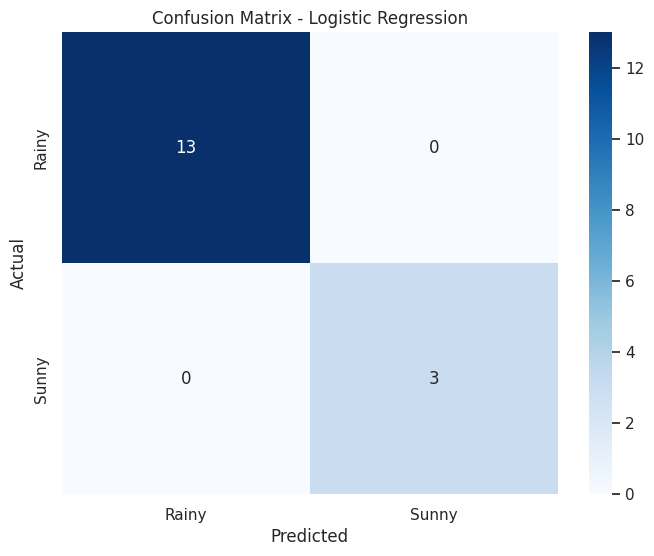

Evaluation Metrics for Decision Tree:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00



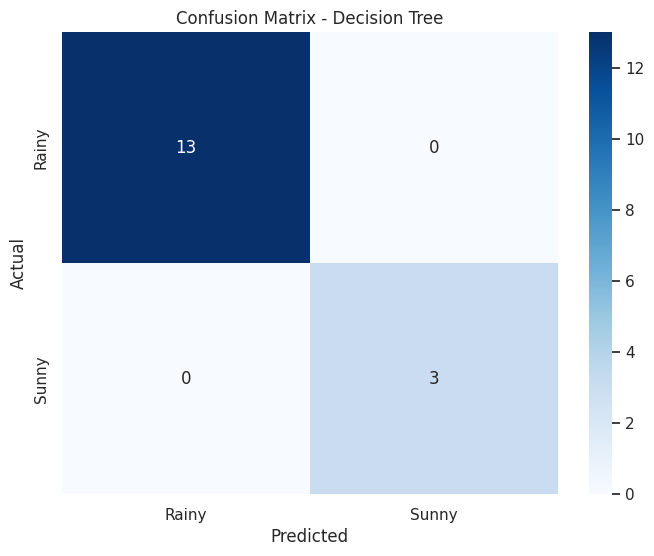

Evaluation Metrics for Random Forest:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00



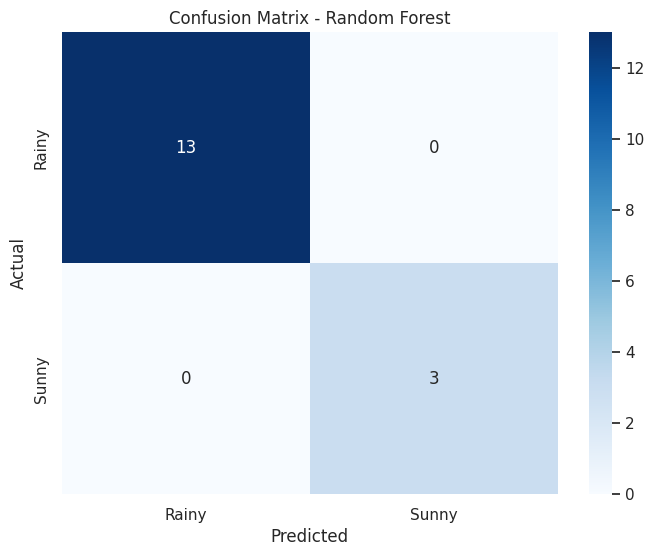

In [20]:
#4.1 Classification

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate a classification model
def evaluate_model(model, X_test, y_test, model_name):
    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print metrics
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}\n")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate Logistic Regression
evaluate_model(logistic_model, X_test, y_test, "Logistic Regression")

# Evaluate Decision Tree
evaluate_model(decision_tree_model, X_test, y_test, "Decision Tree")

# Evaluate Random Forest
evaluate_model(random_forest_model, X_test, y_test, "Random Forest")


In [21]:
#4.1 Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate regression models
def evaluate_regression_model(model, X_test, y_test, model_name):
    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f"Evaluation Metrics for {model_name} (Regression):")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared: {r2:.2f}\n")

# Example: Evaluate Linear Regression (replace with your regression model)
# evaluate_regression_model(linear_model, X_test, y_test, "Linear Regression")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


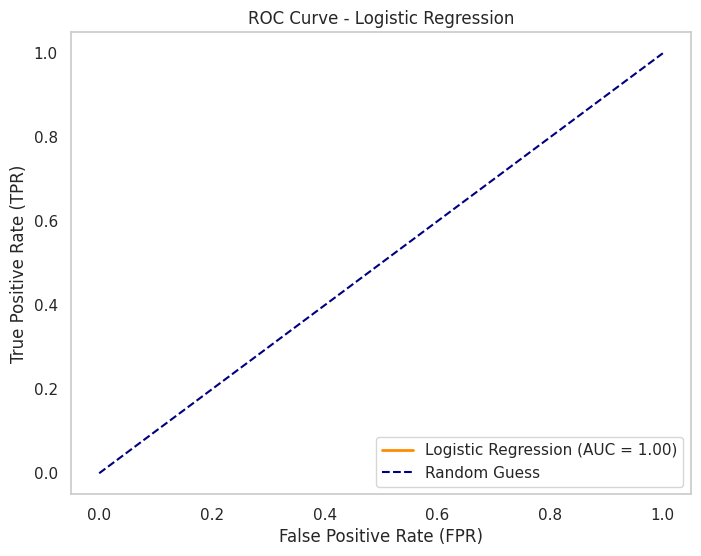

In [22]:
#4.2
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, model_name):
    # Get the predicted probabilities
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Probability for the positive class
    else:
        y_prob = model.decision_function(X_test)  # Decision scores for SVM/linear models

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})', color='darkorange', linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Random Guess')
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Example: Plot ROC curve for Logistic Regression (binary classification example)
plot_roc_curve(logistic_model, X_test, y_test, "Logistic Regression")


In [23]:
#5

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Base Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples required in a leaf
    'bootstrap': [True, False]               # Use bootstrap sampling
}

# Define Random Search
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_grid,
                                   n_iter=10,  # Number of random combinations to try
                                   scoring='accuracy',
                                   cv=3,  # 3-fold cross-validation
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

# Fit Random Search
random_search.fit(X_train, y_train)
print("Best Parameters from Random Search:\n", random_search.best_params_)

# Define Grid Search for more exhaustive search
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)
print("Best Parameters from Grid Search:\n", grid_search.best_params_)

# Evaluate the best model from Grid Search
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Classification metrics for the best model
print("\nEvaluation Metrics for the Best Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters from Random Search:
 {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters from Grid Search:
 {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Evaluation Metrics for the Best Random Forest Model:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       Rainy       1.00      1.00      1.00        13
       Sunny       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

